In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import env

# Acquire the Data

In [4]:
df = pd.read_csv("student_grades.csv")

# Sample and summarize

In [5]:
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100.0,90,95,96
1,2,98.0,93,96,95
2,3,85.0,83,87,87
3,4,83.0,80,86,85
4,5,93.0,90,96,97


In [23]:
## exam3 is missing

In [7]:
df.shape

(104, 5)

In [8]:
df.describe()

,student_id,exam1,exam2,final_grade
count,104.000000,103.000000,104.000000,104.000000
mean,52.500000,78.621359,77.307692,81.692308
std,30.166206,14.260955,10.295703,10.918122
min,1.000000,57.000000,65.000000,65.000000
25%,26.750000,70.000000,70.000000,72.000000
50%,52.500000,79.000000,75.000000,81.000000
75%,78.250000,92.000000,89.000000,93.000000
max,104.000000,100.000000,93.000000,97.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        104 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [10]:
## exam1 appears to be missing a value

## exam3 is an object when it should be numerical, there may be an issue with the values

In [11]:
print(df.isnull().sum())

# find null values

student_id     0
exam1          1
exam2          0
exam3          0
final_grade    0
dtype: int64


In [12]:
print(df.columns[df.isnull().any()])

Index(['exam1'], dtype='object')


In [13]:
df.exam3.value_counts(sort=True, ascending=True)

       1
95     8
85     8
94     8
70     8
87     8
79     8
86     8
75    15
78    16
96    16
Name: exam3, dtype: int64

In [14]:
## there is one single value that is white space, it will need to be dealt with before the column can be converted

In [16]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# replaces all white space values with NaN which can then be converted to numeric

# regex primer:
# ^ : start of characters
# \s: space character
# *: for any number (i.e, any number of whitepsace characters in this case)
#  $: end of the characters
# regex translation: replace any string of whitespace as long as it is strictly whitespace from the begging to end
# replace it with a np.nan so we can just catch it with df.dropna()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   student_id   104 non-null    int64  
 1   exam1        103 non-null    float64
 2   exam2        104 non-null    int64  
 3   exam3        103 non-null    object 
 4   final_grade  104 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


In [18]:
## we can now see the white space value is missing, it can be dropped now

In [19]:
df = df.dropna().astype('int')

# drop all null values

# convert all remaining values to integer data types

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 0 to 103
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   102 non-null    int64
 1   exam1        102 non-null    int64
 2   exam2        102 non-null    int64
 3   exam3        102 non-null    int64
 4   final_grade  102 non-null    int64
dtypes: int64(5)
memory usage: 4.8 KB


In [21]:
df.describe()

,student_id,exam1,exam2,exam3,final_grade
count,102.000000,102.000000,102.000000,102.000000,102.000000
mean,53.313725,78.833333,77.500000,84.294118,81.970588
std,29.886909,14.167375,10.297313,8.736617,10.833991
min,1.000000,57.000000,65.000000,70.000000,65.000000
25%,28.250000,70.000000,70.000000,78.000000,72.000000
50%,53.500000,79.000000,75.000000,85.000000,81.000000
75%,78.750000,92.000000,89.000000,94.000000,93.000000
max,104.000000,100.000000,93.000000,96.000000,97.000000


In [22]:
## exam 3 now shows up since we've converted it to numeric

# Visualize Distribution

## matplotlib.pyplot

In [24]:
## check distribution of values

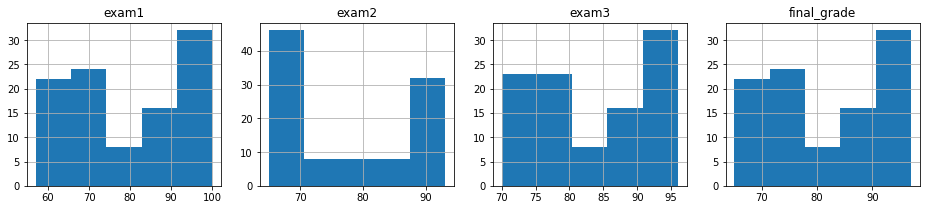

In [25]:
plt.figure(figsize=(16, 3))

for i, col in enumerate(['exam1', 'exam2', 'exam3', 'final_grade']):  
    plot_number = i + 1 # i starts at 0, but plot nos should start at 1
    series = df[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist(bins=5)

## seaborn.boxplot

<AxesSubplot:>

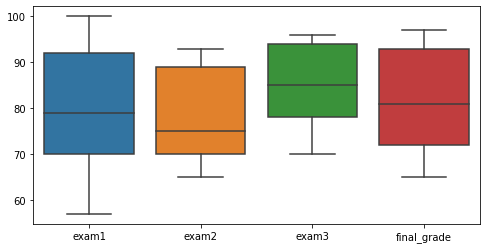

In [26]:
# we don't want to plot the `student_id` column.
plt.figure(figsize=(8,4))
sns.boxplot(data=df.drop(columns=['student_id']))

# Pipeline Function

In [27]:
## create a function that both acquires and preps the data at the same time

In [28]:
def wrangle_grades():
    grades = pd.read_csv("student_grades.csv")
    grades.drop(columns='student_id', inplace=True)
    grades.replace(r'^\s*$', np.nan, regex=True, inplace=True)
    df = grades.dropna().astype('int')
    return df